# Дипломная работа по Feature Engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

Задание

1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

# 1. Загрузите датасет taxi.csv.

In [2]:
data = pd.read_csv('taxi.csv')
data.head(5)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


# 2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.

In [3]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_gk,100000,NaN,NaN,NaN,566219,325936,4,285555,565672,848720,1.13036e+06
weekday_key,100000,NaN,NaN,NaN,3.15986,2.05422,0,1,3,5,6
hour_key,100000,NaN,NaN,NaN,13.8278,7.3065,0,8,16,20,23
driver_gk,100000,NaN,NaN,NaN,3446.38,2038.74,14,1421,3506.5,5242,6806
order_gk,100000,NaN,NaN,NaN,460867,266065,18,229178,462420,690894,920344
driver_latitude,100000,NaN,NaN,NaN,55.7008,2.1359,-1,55.7087,55.7729,55.9607,56.1741
driver_longitude,100000,NaN,NaN,NaN,37.4923,1.45464,-1,37.4135,37.5337,37.6241,38.2805
origin_order_latitude,100000,NaN,NaN,NaN,55.7724,0.665985,-1,55.708,55.7726,55.962,56.3111
origin_order_longitude,100000,NaN,NaN,NaN,37.5416,0.467758,-1,37.4071,37.5325,37.6244,38.2436
distance_km,100000,NaN,NaN,NaN,18.3935,41.1293,-1,-1,10.4115,30.6653,5234.28


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


Наблюдения
- Очевидно, что у переменных distance_km и duration_min имеются выбросы - нужно от них избавиться
- Переменные представляют из себя микс из численных и категориальных переменных, категориальные переменные необходимо перекодировать
- Количество наблюдений одинаково для всех переменных, и пропусков нет

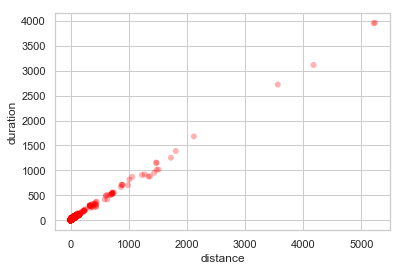

In [5]:
distance = data['distance_km']
duration = data['duration_min']
fig, ax = plt.subplots()
ax.scatter(distance, duration, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('distance')
plt.ylabel('duration')
plt.show()

In [6]:
q_high = data["distance_km"].quantile(0.99)
q_low = data["distance_km"].quantile(0.01)

In [7]:
data = data[(data["distance_km"] < q_high)&(data["distance_km"] > q_low)]

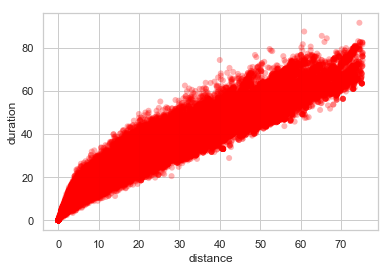

In [8]:
distance = data['distance_km']
duration = data['duration_min']
fig, ax = plt.subplots()
ax.scatter(distance, duration, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('distance')
plt.ylabel('duration')
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72793 entries, 1 to 99999
Data columns (total 14 columns):
offer_gk                  72793 non-null int64
weekday_key               72793 non-null int64
hour_key                  72793 non-null int64
driver_gk                 72793 non-null int64
order_gk                  72793 non-null int64
driver_latitude           72793 non-null float64
driver_longitude          72793 non-null float64
origin_order_latitude     72793 non-null float64
origin_order_longitude    72793 non-null float64
distance_km               72793 non-null float64
duration_min              72793 non-null float64
offer_class_group         72793 non-null object
ride_type_desc            72793 non-null object
driver_response           72793 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 8.3+ MB


In [10]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_gk,72793,NaN,NaN,NaN,565645,326306,4,284765,564459,849525,1.13036e+06
weekday_key,72793,NaN,NaN,NaN,3.15278,2.07615,0,1,3,5,6
hour_key,72793,NaN,NaN,NaN,13.8204,7.29753,0,8,16,20,23
driver_gk,72793,NaN,NaN,NaN,3458.8,2037.39,14,1421,3507,5242,6806
order_gk,72793,NaN,NaN,NaN,462014,266093,27,230798,463337,692550,920344
driver_latitude,72793,NaN,NaN,NaN,55.7716,0.801529,-1,55.7078,55.775,55.9611,56.0185
driver_longitude,72793,NaN,NaN,NaN,37.5374,0.556503,-1,37.4135,37.5274,37.6239,38.2328
origin_order_latitude,72793,NaN,NaN,NaN,55.7733,0.715432,-1,55.7074,55.7753,55.9623,56.0251
origin_order_longitude,72793,NaN,NaN,NaN,37.5386,0.500402,-1,37.4071,37.5266,37.6238,38.2041
distance_km,72793,NaN,NaN,NaN,23.6268,18.4193,0,7.794,18.203,37.748,75.351


# 3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.

In [11]:
data.isnull().sum()
# проверка наличия пропусков - пропусков нет

offer_gk                  0
weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
offer_class_group         0
ride_type_desc            0
driver_response           0
dtype: int64

In [12]:
data.dtypes

offer_gk                    int64
weekday_key                 int64
hour_key                    int64
driver_gk                   int64
order_gk                    int64
driver_latitude           float64
driver_longitude          float64
origin_order_latitude     float64
origin_order_longitude    float64
distance_km               float64
duration_min              float64
offer_class_group          object
ride_type_desc             object
driver_response             int64
dtype: object

In [13]:
data.shape

(72793, 14)

In [14]:
data = data.drop_duplicates()
data.shape

(72793, 14)

In [15]:
data = data.drop(['offer_gk', 'driver_gk', 'driver_latitude', 'order_gk', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis=1)
# убираем столбцы, не несущие нагрузки

# 4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.

In [16]:
data.corr()

,weekday_key,hour_key,distance_km,duration_min,driver_response
weekday_key,1.000000,0.056614,-0.085133,-0.076506,0.041695
hour_key,0.056614,1.000000,-0.056271,-0.062919,0.025991
distance_km,-0.085133,-0.056271,1.000000,0.954388,-0.380896
duration_min,-0.076506,-0.062919,0.954388,1.000000,-0.333342
driver_response,0.041695,0.025991,-0.380896,-0.333342,1.000000


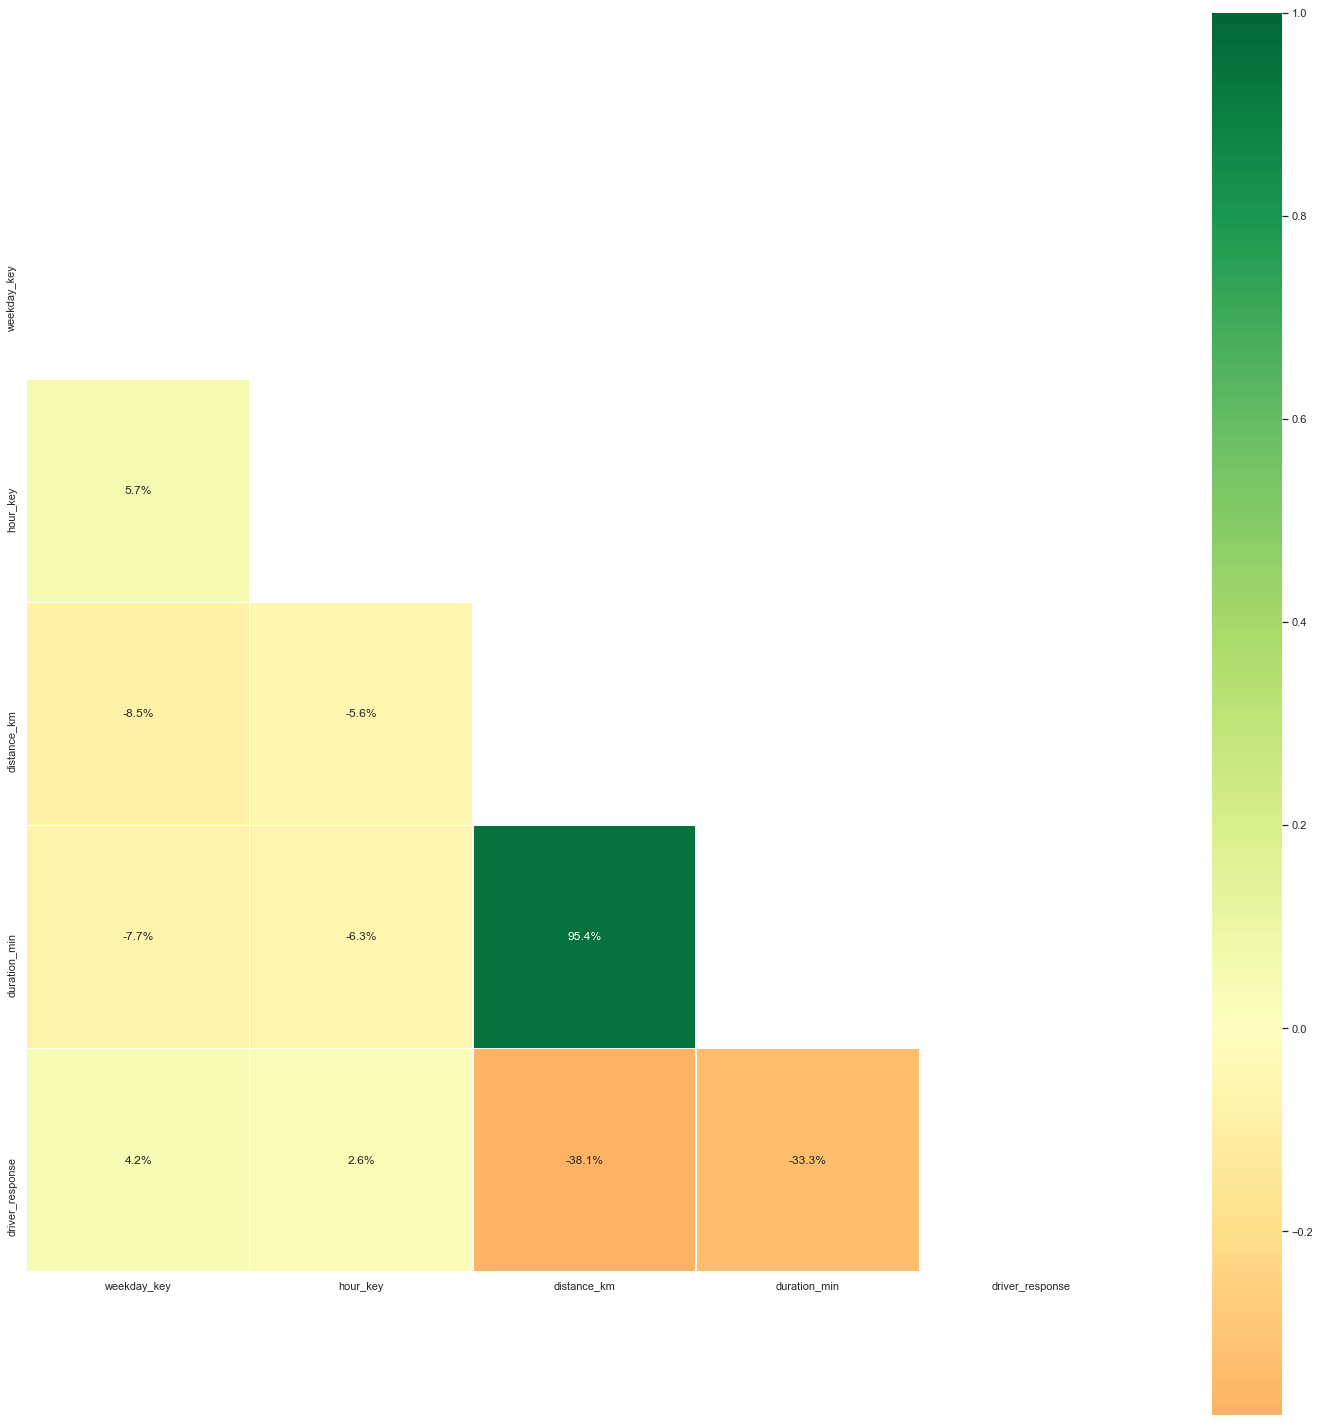

In [17]:
plt.figure(figsize = (20,20))
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
        data=corr,
        mask=mask,
        annot=True,
        cmap='RdYlGn',
        fmt="0.1%",
        linewidths=0.3,
        square=True,
        center=0
)
plt.tight_layout()
plt.show()

Из таблицы корреляций следует, что существует разница в реакции водителей (брать или не брать заказ) в зависимости от длины дистанции и продолжительности поездки. Если я правильно интерпретирую значения, то водители менее охотно берут более длинные / длительные поездки.
Profile reporting не устанавливается

# 5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

Посмотрим, какие значения есть у категориальных переменных

In [18]:
data['offer_class_group'].value_counts()

Economy     40270
Standard    29518
Premium      1001
Delivery      888
Kids          566
XL            435
VIP           104
VIP+           11
Name: offer_class_group, dtype: int64

In [19]:
data['ride_type_desc'].value_counts()

private     72617
business      157
SMB            19
Name: ride_type_desc, dtype: int64

# 6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

In [20]:
data = pd.get_dummies(data=data, columns=['offer_class_group', 'ride_type_desc'])
data.head()

,weekday_key,hour_key,distance_km,duration_min,driver_response,offer_class_group_Delivery,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_business,ride_type_desc_private
1,5,14,18.802,25.217,1,0,0,0,0,1,0,0,0,0,0,1
2,6,14,6.747,9.800,0,0,1,0,0,0,0,0,0,0,0,1
4,4,16,12.383,19.250,1,0,1,0,0,0,0,0,0,0,0,1
5,6,15,6.747,9.800,0,0,1,0,0,0,0,0,0,0,0,1
7,5,20,1.517,3.933,0,0,1,0,0,0,0,0,0,0,0,1


# 7. Разделите выборку на обучаемую и тестовую.

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
x_columns =[x for x in data.columns if x != 'driver_response']
X = data[x_columns]
y = data['driver_response']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

# 8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

In [24]:
from sklearn.metrics import mean_absolute_error
model=RandomForestRegressor(n_estimators=500)
model.fit(X_train,y_train)
y_pred_rfr = model.predict(X_test)
print("MAE: {:.3f}".format(mean_absolute_error(y_test, y_pred_rfr)))

MAE: 0.351


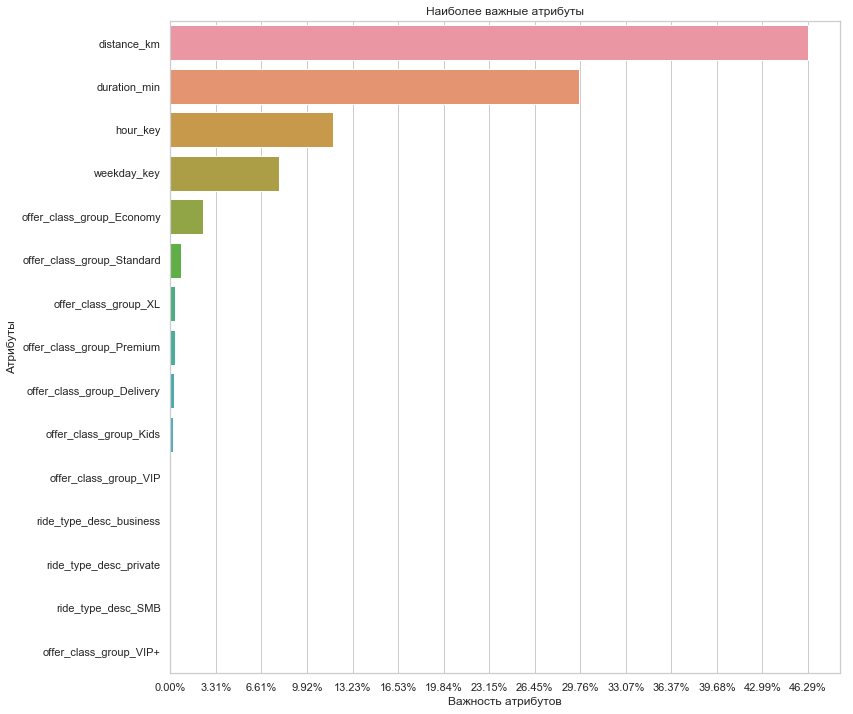

,0
distance_km,0.462933
duration_min,0.296430
hour_key,0.117846
weekday_key,0.078628
offer_class_group_Economy,0.023836
offer_class_group_Standard,0.007428
offer_class_group_XL,0.003482
offer_class_group_Premium,0.003196
offer_class_group_Delivery,0.002355
offer_class_group_Kids,0.002214


In [25]:
headers = list(X_train.columns.values)
# Важность признаков
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)
x_ticks = np.linspace(start = 0, stop=max(feature_imp), num =  15, endpoint = True)
plt.xticks(x_ticks, [f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")

# Важность на графике
plt.show()
# И в DataFrame
pd.DataFrame(feature_imp)

Попробуем запустить модель только с 4 первыми атрибутами

In [26]:
X = data[['distance_km', 'duration_min', 'hour_key', 'weekday_key']]
y = data['driver_response']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

In [28]:
model=RandomForestRegressor(n_estimators=500)
model.fit(X_train,y_train)
y_pred_rfr = model.predict(X_test)
print("MAE: {:.3f}".format(mean_absolute_error(y_test, y_pred_rfr)))

MAE: 0.358


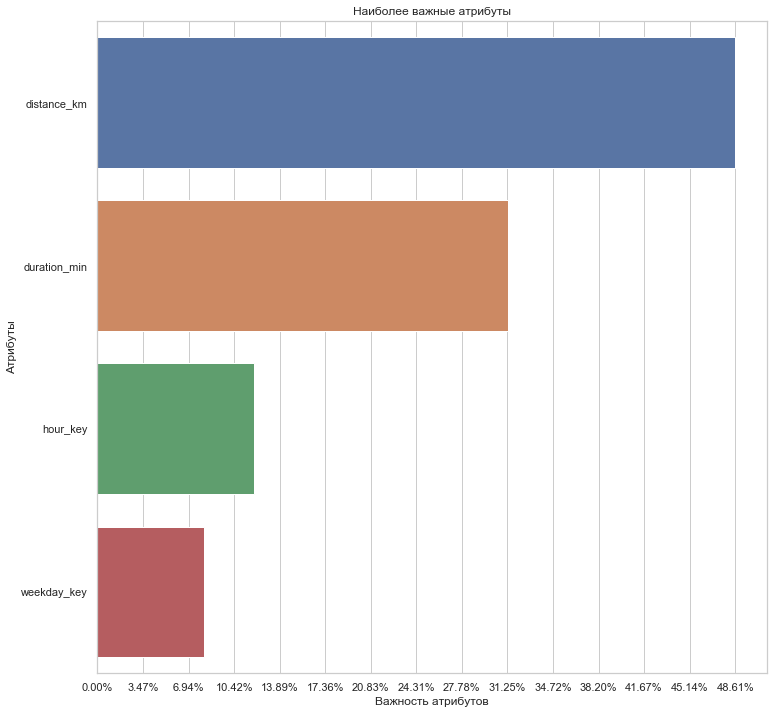

,0
distance_km,0.486146
duration_min,0.312990
hour_key,0.119696
weekday_key,0.081168


In [29]:
headers = list(X_train.columns.values)
# Важность признаков
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)
x_ticks = np.linspace(start = 0, stop=max(feature_imp), num =  15, endpoint = True)
plt.xticks(x_ticks, [f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")

# Важность на графике
plt.show()
# И в DataFrame
pd.DataFrame(feature_imp)

Вывод. Основными аттрибутами остаются длина и продолжительность поездки. С сокращением переменных ошибка практически не изменилась.